# Analyse d'une base de données des clients d'un grossiste 

## Présentation de la base de données

__La base de donnée comprend des grains appartenant à trois variétés différentes de blé : Kama, Rosa et Canadian. La base contient 70 éléments pour chaque variété. Les variables sont quantitatives et sont les suivantes:__

- area (A): Superficie du grain
- perimeter (P): Périmètre
- compactness: Compacité
- length of kernel: longueur du noyau
- width of kernel: largeur du noyau 
- asymmetry coefficient: coefficient d'asymétrie 
- length of kernel groove: longueur de la rainure du noyau

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections
from pandas.plotting import scatter_matrix

"""
 For CPA
"""
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

"""
 For ACM
"""
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn import cluster
from sklearn import metrics

In [2]:
# Import des données
data = pd.read_csv('Acp_classification_Data.csv')
data.head()

A      P       C     LK     WK  A_Coef    LKG  target
0  15.26  14.84  0.8710  5.763  3.312   2.221  5.220       0
1  14.88  14.57  0.8811  5.554  3.333   1.018  4.956       0
2  14.29  14.09  0.9050  5.291  3.337   2.699  4.825       0
3  13.84  13.94  0.8955  5.324  3.379   2.259  4.805       0
4  16.14  14.99  0.9034  5.658  3.562   1.355  5.175       0

## Enoncé

__1. Extraire les données quantitatives et présenter une synthèse des données.__

__2. Analyse ACP:__
   - Effectuer une analyse ACP avec deux dimensions, afficher les valeurs propres et les ratios de variance expliquée par chaque composante. 
   - Quelle quantité d'information est préservée dans ce cas ?
   - Utiliser les métriques, que suggèrent chacune par rapport au nombre de dimensions à garder ? (justifier le raisonnement)
   - Calculer les contributions et les qualités de représentation des individus et des variables par rapport à chacun des            facteurs que vous avez gardés, et analyser.
   - 5.	Afficher le graphique des individus. Utiliser une couleur différente pour chaque classe de grains et analyser ?
   - Calculer les corrélations des variables avec chacun des axes, tracer le cercle des corrélations en prenant deux à deux les      facteurs que avez gardés et analyser.
   
__3. Classification__
   - Effectuer une classification Ascendente Hierarchique : tracer le dendrogramme, utiliser le tracé pour determiner le nombre      de classe à retenir (justifier le raisonnement).
   - Effectuer une classification K-means en utilisant le nombre de classe retenue avec la CAH. 
   - Que suggère la métrique silhouette concernant le nombre de classes K-means ? (justifier le raisonnement)
   - Comparer les classes obtenues avec la CAH et les classes obtenues par K-means, analyser.
   - Etudier les classes obtenues par K-means, analyser les propriétés des grains qui composent chacune des classes.   

In [20]:
# Sélection des variables quantitatives et conversion en forme verticale 
x = data.iloc[:,0:7].values
x

array([[15.26  , 14.84  ,  0.871 , ...,  3.312 ,  2.221 ,  5.22  ],
       [14.88  , 14.57  ,  0.8811, ...,  3.333 ,  1.018 ,  4.956 ],
       [14.29  , 14.09  ,  0.905 , ...,  3.337 ,  2.699 ,  4.825 ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  3.232 ,  8.315 ,  5.056 ],
       [11.84  , 13.21  ,  0.8521, ...,  2.836 ,  3.598 ,  5.044 ],
       [12.3   , 13.34  ,  0.8684, ...,  2.974 ,  5.637 ,  5.063 ]])

In [31]:
# Sélection de la variable catégorielle et conversion en format vertical
y = data.iloc[:,7].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
 # Application de la fonction StandardScaler (mean = 0 et standard deviation = 1) pour centrer reduire les données
x = StandardScaler().fit_transform(x)
x

array([[ 1.42097769e-01,  2.15462437e-01,  6.06017918e-05, ...,
         1.41701823e-01, -9.86151745e-01, -3.83577423e-01],
       [ 1.11880257e-02,  8.22375713e-03,  4.28515270e-01, ...,
         1.97432229e-01, -1.78816620e+00, -9.22013487e-01],
       [-1.92066576e-01, -3.60200562e-01,  1.44238325e+00, ...,
         2.08047544e-01, -6.67479334e-01, -1.18919199e+00],
       ...,
       [-5.67570840e-01, -6.90247348e-01,  7.33948301e-01, ...,
        -7.06044846e-02,  3.07658816e+00, -7.18060432e-01],
       [-1.03608992e+00, -1.03564515e+00, -8.01701104e-01, ...,
        -1.12152071e+00, -6.81351965e-02, -7.42534799e-01],
       [-8.77620233e-01, -9.35863561e-01, -1.10234659e-01, ...,
        -7.55292327e-01,  1.29122264e+00, -7.03783718e-01]])

In [22]:
 # Vérification
import numpy as np
print("La moyenne : ",np.mean(x,axis=0))
print("L'écart type : ",np.std(x,axis=0))
#la moyenne est bien très proche de zéro et l'écart type de 1

La moyenne :  [-3.38353684e-16  1.18423789e-16  1.28574400e-15 -2.09779284e-15
 -3.38353684e-16 -3.38353684e-16 -8.98751972e-17]
L'écart type :  [1. 1. 1. 1. 1. 1. 1.]


In [23]:
# Mise en oeuvre de l'ACP
# Projection sur 2 axes
pca = PCA(n_components = 2)

In [24]:
# Prédiction des scores des deux facteurs retenus
principalComponents = pca.fit_transform(x)

In [25]:
# Visualisation de la matrice dans le nouveau repère
principaldf = pd.DataFrame(data = principalComponents, columns = ['Axe principal 1', 'Axe principal 2'])
principaldf.head(2) 

Axe principal 1  Axe principal 2
0         0.317047         0.783669
1        -0.003386         1.913214

In [33]:
# Constitution de la matrice finale avec la variable qualitative
# axis : {0/’index’, 1/’columns’}, default 0

finaldf = pd.concat([principaldf, data[['target']]], axis = 1)
finaldf.head(2)

Axe principal 1  Axe principal 2  target
0         0.317047         0.783669       0
1        -0.003386         1.913214       0

<AxesSubplot:xlabel='Axe principal 1', ylabel='Axe principal 2'>

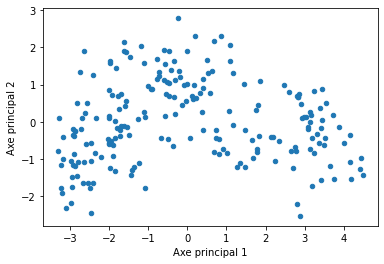

In [34]:
# Première représentation graphique 
principaldf.plot.scatter(x='Axe principal 1', y='Axe principal 2')

In [36]:
 # Attribut pour rechercher les élements uniques d'une liste
finaldf.target.unique()

array([0, 1, 2])

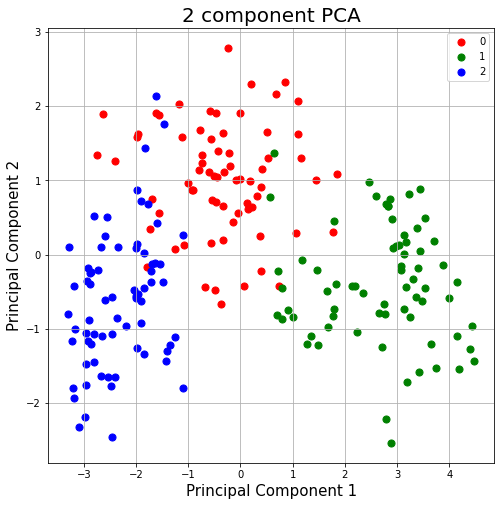

In [38]:
# Visualisation de la matrice
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    # L'indice est True dans le cas ou le nom d'espèce correspond à "target" et sera donc en couleur "color"
    indicesToKeep = finaldf['target'] == target
    # print(indicesToKeep.shape)
    # Loc[ligne, colonne] : ici loc prend uniquement les lignes qui correspondent à True
    ax.scatter(finaldf.loc[indicesToKeep, 'Axe principal 1']
               , finaldf.loc[indicesToKeep, 'Axe principal 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [42]:
#instanciation pour l'ACP
acp = PCA(svd_solver='full')
coord = acp.fit_transform(x)


In [41]:
#nombre de composantes calculées
print(acp.n_components_)
n = (acp.n_components_)

7


In [44]:
# valeurs propres
variance = acp.explained_variance_
print(variance)
eigval = variance*(len(x)-1)/len(x) #ajustement 
print(eigval)

[5.05527392e+00 1.20330286e+00 6.81247474e-01 6.86915798e-02
 1.88031478e-02 5.35755786e-03 8.16283865e-04]
[5.03120119e+00 1.19757285e+00 6.78003439e-01 6.83644770e-02
 1.87136090e-02 5.33204568e-03 8.12396799e-04]


In [45]:
# ratio de réprésentation des valeurs propres
print(acp.explained_variance_ratio_)

[7.18743027e-01 1.71081835e-01 9.68576341e-02 9.76635386e-03
 2.67337271e-03 7.61720812e-04 1.16056686e-04]


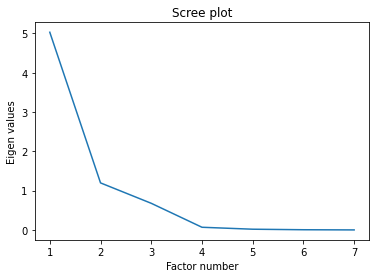

In [46]:
# Détermination du nombre de facteurs à retenir
# scree plot : éboulis des valeurs propres
plt.plot(np.arange(1,n+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

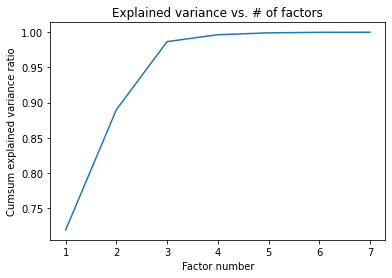

In [47]:
 # cumul de variance expliquée
plt.plot(np.arange(1,n+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

In [48]:
 # test des bâtons brisés
bk = 1/np.arange(n,0,-1)
#print(bk)
bk = np.cumsum(bk)
#print(bk)
bk = bk[::-1]
#print(bk)
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bk}))

   Val.Propre    Seuils
0    5.031201  2.592857
1    1.197573  1.592857
2    0.678003  1.092857
3    0.068364  0.759524
4    0.018714  0.509524
5    0.005332  0.309524
6    0.000812  0.142857


In [50]:
# CLASSIFICATION

In [59]:
data.describe()

A           P           C          LK          WK      A_Coef  \
count  210.000000  210.000000  210.000000  210.000000  210.000000  210.000000   
mean    14.847524   14.559286    0.870999    5.628533    3.258605    3.700201   
std      2.909699    1.305959    0.023629    0.443063    0.377714    1.503557   
min     10.590000   12.410000    0.808100    4.899000    2.630000    0.765100   
25%     12.270000   13.450000    0.856900    5.262250    2.944000    2.561500   
50%     14.355000   14.320000    0.873450    5.523500    3.237000    3.599000   
75%     17.305000   15.715000    0.887775    5.979750    3.561750    4.768750   
max     21.180000   17.250000    0.918300    6.675000    4.033000    8.456000   

              LKG      target  
count  210.000000  210.000000  
mean     5.408071    1.000000  
std      0.491480    0.818448  
min      4.519000    0.000000  
25%      5.045000    0.000000  
50%      5.223000    1.000000  
75%      5.877000    2.000000  
max      6.550000    2.000000

In [54]:
# on centre et on réduit

sc = StandardScaler() #pour centrer reduire on créer l'objet sc
data_cr = sc.fit_transform(data.values) # .values pour avoir que les chiffres
data_cr

array([[ 1.42097769e-01,  2.15462437e-01,  6.06017918e-05, ...,
        -9.86151745e-01, -3.83577423e-01, -1.22474487e+00],
       [ 1.11880257e-02,  8.22375713e-03,  4.28515270e-01, ...,
        -1.78816620e+00, -9.22013487e-01, -1.22474487e+00],
       [-1.92066576e-01, -3.60200562e-01,  1.44238325e+00, ...,
        -6.67479334e-01, -1.18919199e+00, -1.22474487e+00],
       ...,
       [-5.67570840e-01, -6.90247348e-01,  7.33948301e-01, ...,
         3.07658816e+00, -7.18060432e-01,  1.22474487e+00],
       [-1.03608992e+00, -1.03564515e+00, -8.01701104e-01, ...,
        -6.81351965e-02, -7.42534799e-01,  1.22474487e+00],
       [-8.77620233e-01, -9.35863561e-01, -1.10234659e-01, ...,
         1.29122264e+00, -7.03783718e-01,  1.22474487e+00]])

In [55]:
 #dimension des données

print(data.shape)

#statistiques descriptives

print(data.describe())

(210, 8)
                A           P           C          LK          WK      A_Coef  \
count  210.000000  210.000000  210.000000  210.000000  210.000000  210.000000   
mean    14.847524   14.559286    0.870999    5.628533    3.258605    3.700201   
std      2.909699    1.305959    0.023629    0.443063    0.377714    1.503557   
min     10.590000   12.410000    0.808100    4.899000    2.630000    0.765100   
25%     12.270000   13.450000    0.856900    5.262250    2.944000    2.561500   
50%     14.355000   14.320000    0.873450    5.523500    3.237000    3.599000   
75%     17.305000   15.715000    0.887775    5.979750    3.561750    4.768750   
max     21.180000   17.250000    0.918300    6.675000    4.033000    8.456000   

              LKG      target  
count  210.000000  210.000000  
mean     5.408071    1.000000  
std      0.491480    0.818448  
min      4.519000    0.000000  
25%      5.045000    0.000000  
50%      5.223000    1.000000  
75%      5.877000    2.000000  
max  

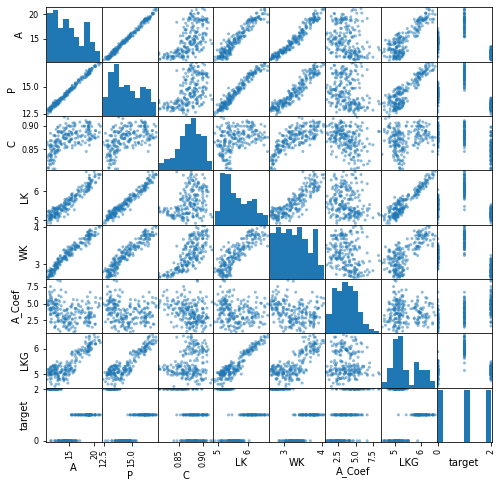

In [56]:
#graphique - croisement deux à deux des variables
# 8 colonnes 
#créer 64 images (8x8) et les affiches pour voir si il y a une relation entre les colonnes
#permet de voir si les variables sont colérées et potentiellement pouvoir retirer des variables (éliminer les données redondantes)
scatt_mat = scatter_matrix(data,figsize=(8,8))[-1]

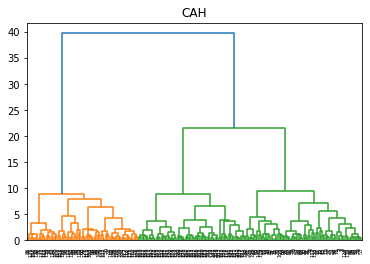

In [60]:
#générer la matrice des liens

Z = linkage(x,method='ward',metric='euclidean') #sans la variable categoricielle

#affichage du dendrogramme

plt.title("CAH")
dendrogram(Z,labels=data.index)
plt.show()

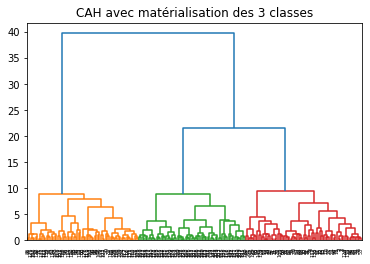

In [64]:
#matérialisation des 4 classes (hauteur t = 10)

plt.title('CAH avec matérialisation des 3 classes')
dendrogram(Z,labels=data.index,color_threshold=10) #,orientation='right'
plt.show()

In [62]:
#découpage à la hauteur t = 10 ==> identifiants de 3 groupes obtenus

groupes_cah = fcluster(Z,t=10,criterion='distance')
print(groupes_cah)

[3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3
 1 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 3 1 3 3 1 2 2 2 2 2 2 3 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 2 2 2 2 2 2 2 2]


In [65]:
#index triés des groupes

idg = np.argsort(groupes_cah)

#affichage des observations et leurs groupes

print(pd.DataFrame(data.index[idg],groupes_cah[idg]))

      0
1   104
1    97
1    96
1    95
1    94
..  ...
3    51
3    52
3    53
3    55
3     0

[210 rows x 1 columns]


In [67]:
#k-means sur les données centrées et réduites

kmeans = cluster.KMeans(n_clusters=3)  # on choisit 3 avec l'étude du dessus
kmeans.fit(data_cr)

#index triés des groupes

print(kmeans.labels_)
idk = np.argsort(kmeans.labels_)

#affichage des observations et leurs groupes

print(pd.DataFrame(data.index[idk],kmeans.labels_[idk]))


[2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
      0
0   104
0   100
0    99
0    98
0    97
..  ...
2    49
2    50
2    51
2    45
2     0

[210 rows x 1 columns]


In [69]:
#distances aux centres de classes des observations

dist_data = pd.DataFrame(kmeans.transform(data_cr),index = data.index)
print(dist_data)

            0         1         2
0    3.036484  3.950064  1.024163
1    3.860291  4.300179  1.216057
2    4.231003  4.077926  1.282333
3    4.280719  3.974866  1.081677
4    3.204132  4.991985  1.830097
..        ...       ...       ...
205  5.072682  1.587790  2.957661
206  5.593293  0.590206  3.591283
207  5.295472  3.095372  4.548400
208  5.248588  0.826486  3.272768
209  4.956159  1.053694  3.428974

[210 rows x 3 columns]


In [70]:
 #correspondance avec les groupes de la CAH

pd.crosstab(groupes_cah,kmeans.labels_)

col_0   0   1   2
row_0            
1      67   0   3
2       0  65   2
3       3   5  65

[0.40553877 0.4850202  0.38954713 0.30771858 0.25900382 0.25613705
 0.2647932  0.25904074 0.2660856  0.26900584 0.25821344 0.26286028
 0.25162679 0.2655343  0.25396788]


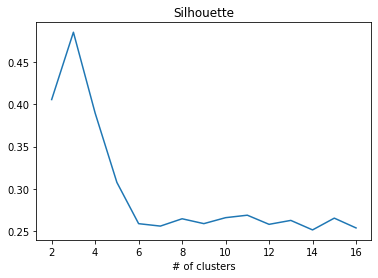

In [71]:

#utilisation de la métrique "silhouette"
#faire varier le nombre de clusters de 2 à 10
res = np.arange(15,dtype="double")
for k in np.arange(15):
    km = cluster.KMeans(n_clusters=k+2)
    km.fit(data_cr)
    res[k] = metrics.silhouette_score(data_cr,km.labels_)
print(res)

#graphique
import matplotlib.pyplot as plt
plt.title("Silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,17,1),res)
plt.show() 

In [ ]:
  # le nombre de groupes le plus adapté au sens de la metric "silhouette" est 3.